In [1]:
import csv
import pandas as pd

import numpy as np

import pandas as pd
pd.set_option('display.notebook_repr_html', False)

from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import homogeneity_score, v_measure_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import seaborn as sns

data = pd.read_csv('radiology_data_final.csv')
data = data.drop('Unnamed: 0', 1)
data

     Airport_Code                Hospital_Name  \
0              SF              SF - Zuckerberg   
1              SF              SF - Zuckerberg   
2              SF              SF - Zuckerberg   
3              SF              SF - Zuckerberg   
4              SF              SF - Zuckerberg   
...           ...                          ...   
5407          SLC  University of Utah Hospital   
5408          SLC  University of Utah Hospital   
5409          SLC  University of Utah Hospital   
5410          SLC  University of Utah Hospital   
5411          SLC  University of Utah Hospital   

                   Procedure_Description  Cash_Price  Gross_Price CPT_Code  \
0         Hc Mri Wrist Right Wo/contrast     4856.05      4856.05    73221   
1         Hc Mri Elbow Right Wo/contrast     4856.05      4856.05    73221   
2      Hc Mri Shoulder Right Wo/contrast     4856.05      4856.05    73221   
3      Hc Mri Arm Rt Non Joint W&wo/cont     4856.05      4856.05    73220   
4     Hc 

In [2]:
data.isnull().sum()

Airport_Code                   0
Hospital_Name                  0
Procedure_Description          0
Cash_Price                   200
Gross_Price                  798
CPT_Code                       0
Number_Beds                    0
For_Profit                     0
Yearly_Discharges              0
Patient_Experience_Rating      0
Radiology_Category             0
dtype: int64

In [3]:
### this fills null values with the average for the cpt code associated with that row
data['Cash_Price'] = data['Cash_Price'].fillna(data.groupby('CPT_Code')['Cash_Price'].transform('mean'))
data['Gross_Price'] = data['Gross_Price'].fillna(data.groupby('CPT_Code')['Gross_Price'].transform('mean'))

#data = data.loc['Cash_Price' >= 'Gross_Price', 'Cash_Price'] = data['Gross_Price']

data.to_csv('testraddata.csv')

In [4]:
data.isnull().sum()

Airport_Code                 0
Hospital_Name                0
Procedure_Description        0
Cash_Price                   0
Gross_Price                  3
CPT_Code                     0
Number_Beds                  0
For_Profit                   0
Yearly_Discharges            0
Patient_Experience_Rating    0
Radiology_Category           0
dtype: int64

In [5]:
data = data.dropna(axis=0)

In [6]:
data.isnull().sum()

Airport_Code                 0
Hospital_Name                0
Procedure_Description        0
Cash_Price                   0
Gross_Price                  0
CPT_Code                     0
Number_Beds                  0
For_Profit                   0
Yearly_Discharges            0
Patient_Experience_Rating    0
Radiology_Category           0
dtype: int64

In [7]:
X = data.drop(['Airport_Code', 'Hospital_Name', 'Procedure_Description', 'CPT_Code', 'Radiology_Category'], 1)
y = data[['Airport_Code', 'Hospital_Name', 'Procedure_Description', 'CPT_Code', 'Radiology_Category']]

In [8]:
X

      Cash_Price  Gross_Price  Number_Beds  For_Profit  Yearly_Discharges  \
0        4856.05  4856.050000          397           0              15244   
1        4856.05  4856.050000          397           0              15244   
2        4856.05  4856.050000          397           0              15244   
3        4856.05  4856.050000          397           0              15244   
4        4856.05  4856.050000          397           0              15244   
...          ...          ...          ...         ...                ...   
5407      576.50  1090.514872          585           0              32440   
5408     1566.70  3485.263333          585           0              32440   
5409      326.60   618.153030          585           0              32440   
5410      188.60   851.925000          585           0              32440   
5411      248.90   847.981304          585           0              32440   

      Patient_Experience_Rating  
0                             3  
1      

In [9]:
y

     Airport_Code                Hospital_Name  \
0              SF              SF - Zuckerberg   
1              SF              SF - Zuckerberg   
2              SF              SF - Zuckerberg   
3              SF              SF - Zuckerberg   
4              SF              SF - Zuckerberg   
...           ...                          ...   
5407          SLC  University of Utah Hospital   
5408          SLC  University of Utah Hospital   
5409          SLC  University of Utah Hospital   
5410          SLC  University of Utah Hospital   
5411          SLC  University of Utah Hospital   

                   Procedure_Description CPT_Code Radiology_Category  
0         Hc Mri Wrist Right Wo/contrast    73221                MRI  
1         Hc Mri Elbow Right Wo/contrast    73221                MRI  
2      Hc Mri Shoulder Right Wo/contrast    73221                MRI  
3      Hc Mri Arm Rt Non Joint W&wo/cont    73220                MRI  
4     Hc Mra Leg Bilateral W Wo Contrast    

[8.11366243e-01 1.78356569e-01 1.01551796e-02 1.22001487e-04
 5.64677183e-09 7.97527009e-10]


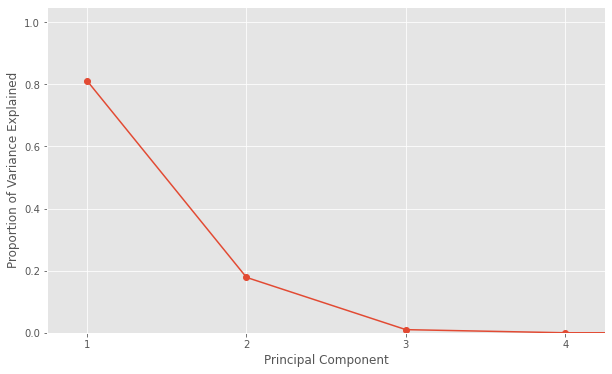

In [10]:
pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

# Variance ratio of the four principal components
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

plt.plot([1,2,3,4,5,6], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

In [11]:
### interesting, there is way more variance in the cash price for hospitals

# Regression

In [12]:
# imports and setup

import scipy as sc
from scipy.stats import norm

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [13]:
data

     Airport_Code                Hospital_Name  \
0              SF              SF - Zuckerberg   
1              SF              SF - Zuckerberg   
2              SF              SF - Zuckerberg   
3              SF              SF - Zuckerberg   
4              SF              SF - Zuckerberg   
...           ...                          ...   
5407          SLC  University of Utah Hospital   
5408          SLC  University of Utah Hospital   
5409          SLC  University of Utah Hospital   
5410          SLC  University of Utah Hospital   
5411          SLC  University of Utah Hospital   

                   Procedure_Description  Cash_Price  Gross_Price CPT_Code  \
0         Hc Mri Wrist Right Wo/contrast     4856.05  4856.050000    73221   
1         Hc Mri Elbow Right Wo/contrast     4856.05  4856.050000    73221   
2      Hc Mri Shoulder Right Wo/contrast     4856.05  4856.050000    73221   
3      Hc Mri Arm Rt Non Joint W&wo/cont     4856.05  4856.050000    73220   
4     Hc 

In [14]:
LRData = data

In [15]:
LRData["Airport_Code"] = LRData["Airport_Code"].astype('category')
LRData["Airport_Code_Num"] = LRData["Airport_Code"].cat.codes

LRData["Hospital_Name"] = LRData["Hospital_Name"].astype('category')
LRData["Hospital_Name_Num"] = LRData["Hospital_Name"].cat.codes

LRData["Radiology_Category"] = LRData["Radiology_Category"].astype('category')
LRData["Radiology_Category_Num"] = LRData["Radiology_Category"].cat.codes

LRData

<ipython-input-15-365669cf4136>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LRData["Airport_Code"] = LRData["Airport_Code"].astype('category')
<ipython-input-15-365669cf4136>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LRData["Airport_Code_Num"] = LRData["Airport_Code"].cat.codes
<ipython-input-15-365669cf4136>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

     Airport_Code                Hospital_Name  \
0              SF              SF - Zuckerberg   
1              SF              SF - Zuckerberg   
2              SF              SF - Zuckerberg   
3              SF              SF - Zuckerberg   
4              SF              SF - Zuckerberg   
...           ...                          ...   
5407          SLC  University of Utah Hospital   
5408          SLC  University of Utah Hospital   
5409          SLC  University of Utah Hospital   
5410          SLC  University of Utah Hospital   
5411          SLC  University of Utah Hospital   

                   Procedure_Description  Cash_Price  Gross_Price CPT_Code  \
0         Hc Mri Wrist Right Wo/contrast     4856.05  4856.050000    73221   
1         Hc Mri Elbow Right Wo/contrast     4856.05  4856.050000    73221   
2      Hc Mri Shoulder Right Wo/contrast     4856.05  4856.050000    73221   
3      Hc Mri Arm Rt Non Joint W&wo/cont     4856.05  4856.050000    73220   
4     Hc 

In [16]:
priceLR = sm.ols(formula="Patient_Experience_Rating ~ Number_Beds + For_Profit + Cash_Price + Gross_Price + Yearly_Discharges", data=LRData).fit()
priceLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Patient_Experience_Rating   R-squared:                       0.431
Model:                                   OLS   Adj. R-squared:                  0.430
Method:                        Least Squares   F-statistic:                     817.5
Date:                       Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                               16:05:25   Log-Likelihood:                -4512.5
No. Observations:                       5409   AIC:                             9037.
Df Residuals:                           5403   BIC:                             9077.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2240      0.032    132.062      0.000       4.161       4.287
Number_Beds          -0.0032   9.62e-05    -33.493      0.000      -0.003      -0.003
For_Profit           -1.1388      0.022    -51.951      0.000      -1.182      -1.096
Cash_Price            0.0001   6.71e-06     16.669      0.000    9.87e-05       0.000
Gross_Price        -8.56e-05   5.26e-06    -16.261      0.000   -9.59e-05   -7.53e-05
Yearly_Discharges  1.942e-05   1.33e-06     14.567      0.000    1.68e-05     2.2e-05
==============================================================================
Omnibus:                       95.337   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.922
Skew:                           0.296   Prob(JB):                     4.03e-21
Kurtosis:                       2.743   Cond. No.                     7.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""